In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *


In [2]:
weather = getWeatherDF()

weather['forecast_timestamp'] = pd.to_datetime(weather['forecastdate'], format="%d-%m-%Y %H:%M")
print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())

Weather from  2024-11-15 04:49:26  To  2024-11-15 04:56:52


In [14]:
#ns10min = 30*60*1000000000   # 30 minutes in nanoseconds 
#tweets['Tweet timestamp 10mins'] = pd.to_datetime(((tweets['Tweet timestamp'].astype(np.int64) // ns10min + 1 ) * ns10min))
#tweets['Tweet timestamp 10mins'] = pd.to_datetime(tweets['Tweet timestamp 10mins'], format="%d-%m-%Y %H:%M")

Text(0.5, 1.0, 'Total weather data recorded')

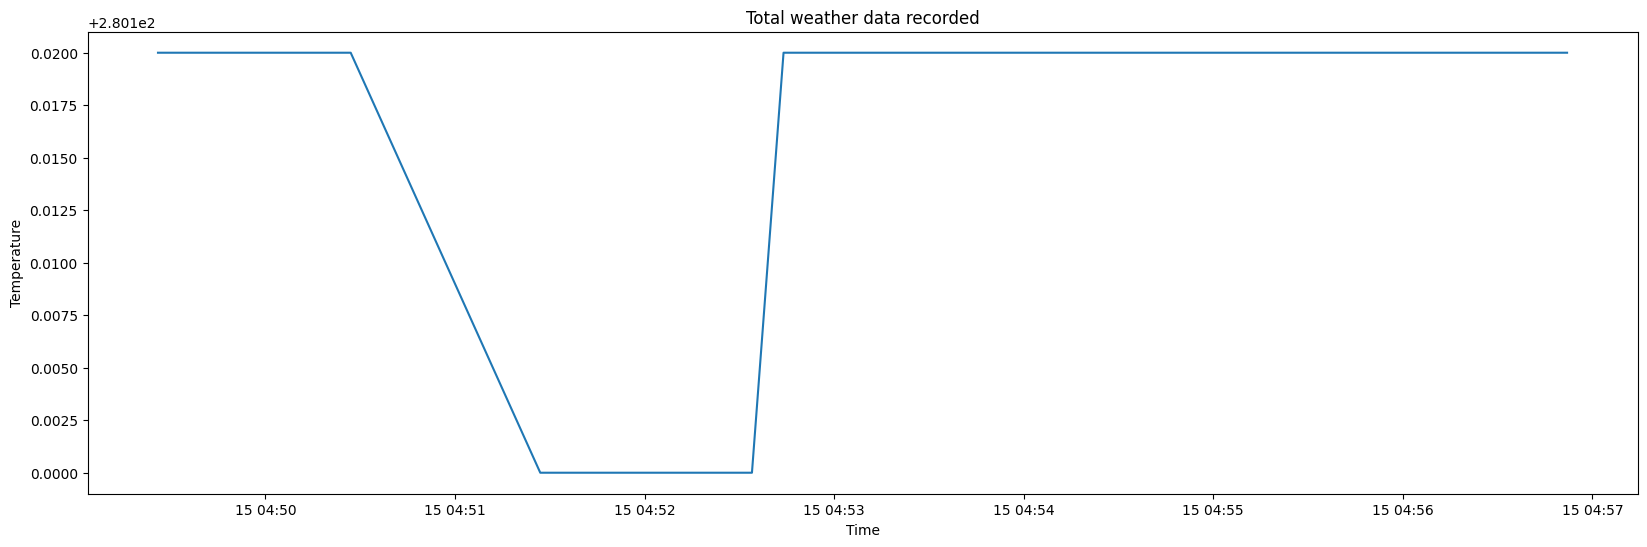

In [4]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Total weather data recorded")

Text(0, 0.5, 'Feels like Temperature in (Kelvin)')

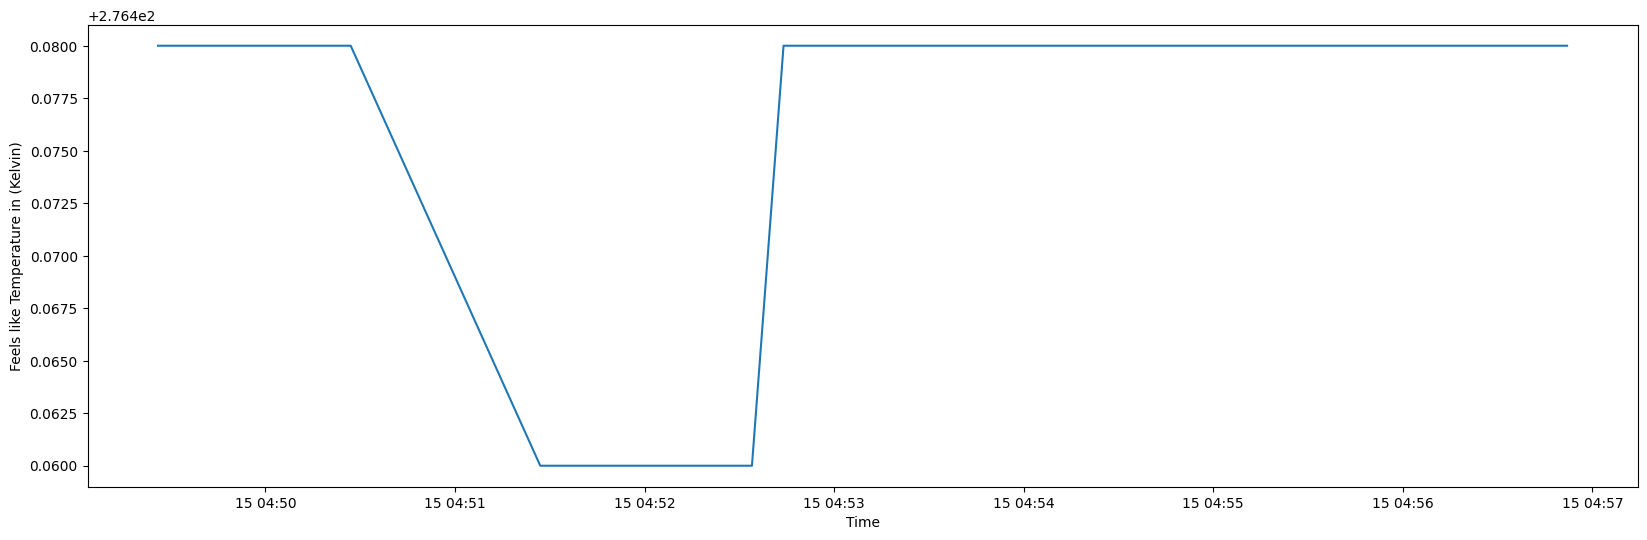

In [5]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['feels_like'])
plt.xlabel("Time")
plt.ylabel("Feels like Temperature in (Kelvin)")

Text(0.5, 1.0, "Plotting 'Feels like' temperature")

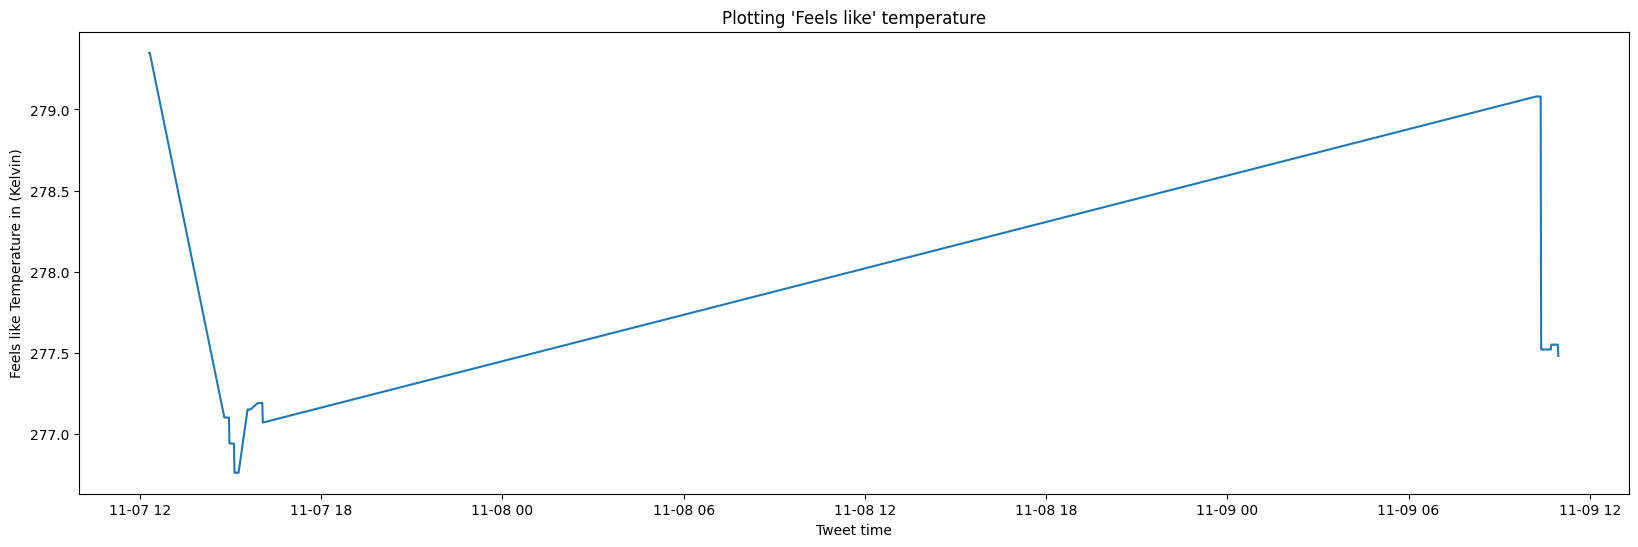

In [18]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['feels_like'])
plt.xlabel("Tweet time")
plt.ylabel("Feels like Temperature in (Kelvin)")
plt.title("Plotting 'Feels like' temperature")